# Imports

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('playground-series-s3e20/train.csv')

In [4]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# PCA
This dataset consists of 497 timeseries, with one timeseries per location. We can perform PCA on the timeseries to reduce the number of timeseries we need to forecast

In [17]:
test = df.pivot(index = ['year','week_no'], 
                    columns = ['latitude', 'longitude'], 
                    values = 'emission')

In [18]:
test.head()

latitude        -0.510    -0.528    -0.547      -0.569    -0.598    -0.604  \
longitude       29.290    29.472    29.653      30.031    29.102    29.896   
year week_no                                                                 
2019 0        3.750994  3.857115  0.500023  100.382980  0.076542  64.49460   
     1        4.025176  4.213432  0.529315  106.375980  0.081001  68.42294   
     2        4.231381  4.451489  0.554183  110.766335  0.084788  71.01155   
     3        4.305286  4.553981  0.561553  113.097940  0.085920  72.57178   
     4        4.347317  4.676066  0.559731  114.985886  0.085650  73.83461   

latitude         -0.615      -0.627     -0.637     -0.653  ...    -3.095  \
longitude        30.885      29.773     30.763     30.447  ...    29.505   
year week_no                                               ...             
2019 0        76.600110  101.643295  40.153328  28.108765  ...  5.375411   
     1        82.630714  109.828674  41.531597  29.032100  ...  5.420106   
     2        86.668290  115.189064  42.774483  29.870031  ...  5.327792   
     3        88.741880  117.846870  43.542730  30.415354  ...  5.422680   
     4        91.137010  120.702270  43.739470  30.567698  ...  5.316918   

latitude        -3.099      -3.133     -3.136     -3.138     -3.153    -3.161  \
longitude       29.601      29.467     30.364     30.662     30.347    28.839   
year week_no                                                                    
2019 0        69.82686  105.982190  14.774838  23.184301  15.069341  0.106631   
     1        74.35756  113.068474  15.337234  24.404161  16.217907  0.112878   
     2        77.72222  118.279810  15.730142  25.097378  16.811665  0.118181   
     3        79.23992  120.618580  15.979696  25.591475  17.231894  0.119753   
     4        80.32427  122.382960  15.905249  25.756530  17.642060  0.119364   

latitude         -3.174     -3.287     -3.299  
longitude        29.926     29.713     30.301  
year week_no                                   
2019 0        41.193130  39.696404  26.111166  
     1        43.877285  43.529408  28.045977  
     2        45.760826  45.993286  29.293518  
     3        46.675327  47.163128  29.950650  
     4        47.317184  48.742470  30.572742  

[5 rows x 497 columns]

In [100]:
pca = PCA(n_components=10)
pca.fit(test)
dfpca = pca.transform(test)

Text(0, 0.5, 'Cumulative Explained Variance')

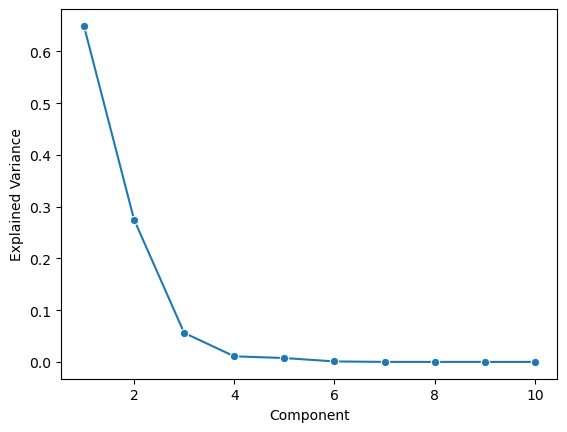

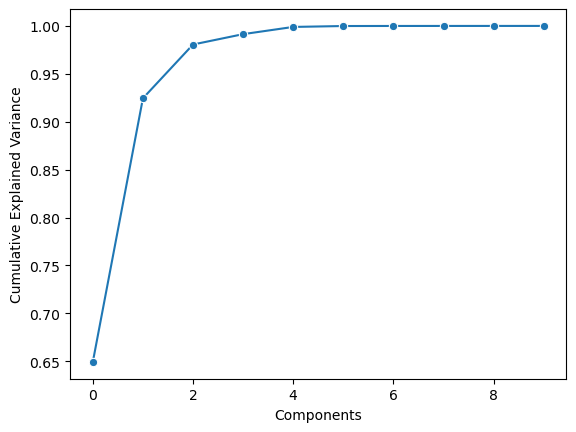

In [105]:
ax = sns.lineplot(x = np.arange(1, len(pca.explained_variance_ratio_)+1), 
             y = pca.explained_variance_ratio_, 
             marker='o')
ax.set_xlabel('Component')
ax.set_ylabel('Explained Variance')

plt.figure()
ax = sns.lineplot(x = np.arange(0, len(pca.explained_variance_ratio_)), 
             y = np.cumsum(pca.explained_variance_ratio_), 
             marker='o')
ax.set_xlabel('Components')
ax.set_ylabel('Cumulative Explained Variance')

The above plots suggest that 2 components can explain 92% of the variance, and 3 components explain 98% of the variance in the timeseries, and 5 components explain 99.8 percent of the variance. Thus, the timeseries are highly correlated, and we only need to analyze 3-5 timeseries components. 

In [106]:
dfpca = pd.DataFrame(dfpca, columns = ['ts '+str(i) for i in range(10)])
dfpca.head()

,ts 0,ts 1,ts 2,ts 3,ts 4,ts 5,ts 6,ts 7,ts 8,ts 9
0,1579.901004,-165.215375,212.633864,131.779458,82.251463,-11.771136,8.332433,0.122090,0.441074,2.626585
1,1745.315462,-5.430768,60.114016,82.245162,43.249278,-5.606973,-4.659071,2.463270,2.466544,2.532008
2,1881.181782,100.812227,-46.207166,24.830942,23.817648,-1.587840,-8.948936,3.264535,3.903450,2.544842
3,1921.800079,153.848545,-90.330150,20.721975,14.168593,3.452747,-9.762655,3.358161,3.941225,2.583824
4,1918.990633,193.784085,-126.290328,34.467612,-37.704049,8.140463,-13.192799,1.811543,3.637781,2.993408


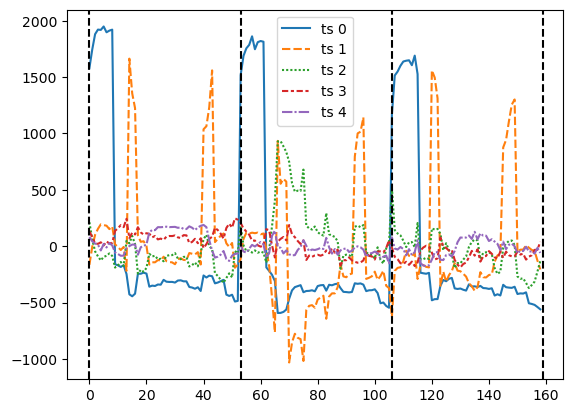

In [107]:
palette = sns.color_palette("tab10")
num_components = 5
#for column in dfpca.columns:
#    ax = sns.lineplot(data = dfpca.loc[:, column])
ax = sns.lineplot(dfpca.loc[:,dfpca.columns[:num_components]])
plt.legend()    

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

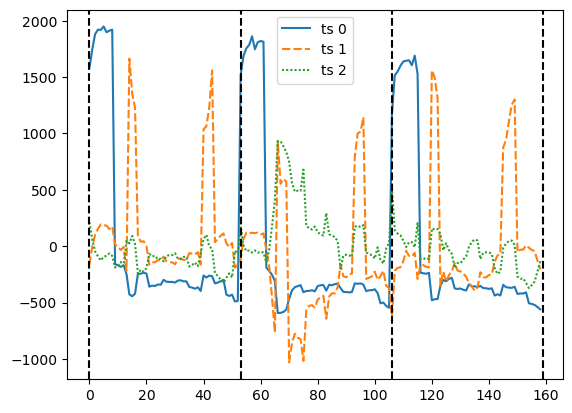

In [108]:
palette = sns.color_palette("tab10")
num_components = 3
ax = sns.lineplot(dfpca.loc[:,dfpca.columns[:num_components]])
plt.legend()    

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

These components account for 98% of the variability in all the time series. The two most important components clearly exhibit yearly seasonality. The most important component displays a slight downward trend, while the second componenet exhibits a dip. Finally the third most important component spikes in 2020, and can be seen as the 'Covid' component. 

# Analyzing seasonality
We analyze the periodograms of the 3 most important components, to analyze the frequency of the fourier features to include when forecasting each one of them. 